In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Supporting Functions

In [2]:
def compute_weights(df):
    """ Method to compute weights from given dataframe. 
    Weights are computed using Linear least squares method, 
    with number of data samples equal to size."""
    d = df.shape[1]
    y = df.to_numpy()[:,d-1]
    a = df.to_numpy()[:,0:d-1]
    temp = np.matmul(a.transpose(), a)
    w = np.linalg.inv(temp).dot(a.transpose()).dot(y)
    return w

In [3]:
def loss(weights, df):
    """Computes accracy of data with respesct to classifier
        defined by weights"""
    n = df.shape[0]
    d = df.shape[1]
    l = 0.0
    a = df.to_numpy()
    for i in range(n):
        t = a[i,0:d-1]
        yhat = t.dot(weights)
        l += (yhat-a[i,d-1])**2
    return l/n


In [53]:
def plot(weights,df,label,ind):
    n = df.shape[0]
    d = df.shape[1]    
    a = df.to_numpy()
    x = a[:,1]
    yhat = np.zeros(n)
    for i in range(n):
        t = np.array(a[i,0:d-1])
        yhat[i] = t.dot(weights)
    # plt.subplot(8,2,ind)
    plt.plot(x,yhat,label = label)
    plt.legend()
    plt.savefig('/content/'+label+'.pdf')

# Load Training Data

In [54]:
train = pd.read_csv("1D_regression_data.csv", header = None, 
                    sep = "    ", engine = 'python')
n = train.shape[0]
print(f"Total samples: {n}")

Total samples: 100


Test, Train split of sizes 0.25n and 0.75n

In [55]:
samples = np.random.rand(n) < 0.75
print("Training size: ", samples.sum())
print("Test size: ", n-samples.sum())
test = train[~samples]
train = train[samples]
train_numpy = train.to_numpy()
test_numpy = test.to_numpy()


Training size:  79
Test size:  21


In [56]:
# Extract x and y to plot data points
train_x = train_numpy[:,0]
train_y = train_numpy[:,1]

test_x = test_numpy[:,0]
test_y = test_numpy[:,1]

# Insert bias term
train.insert(0,'bias',np.ones(train_x.size),True)
test.insert(0,'bias',np.ones(test_x.size),True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

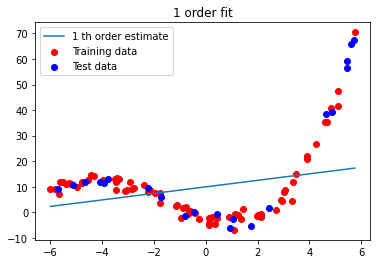

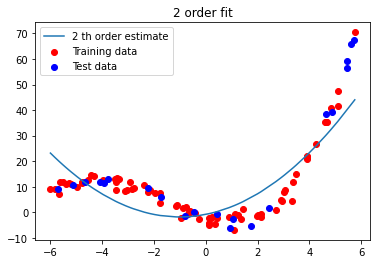

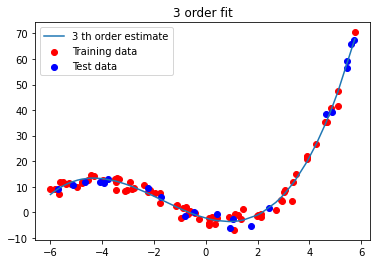

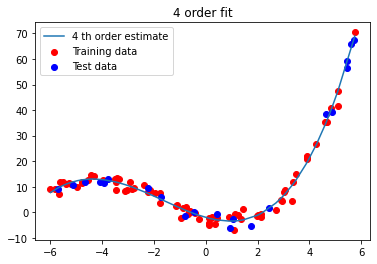

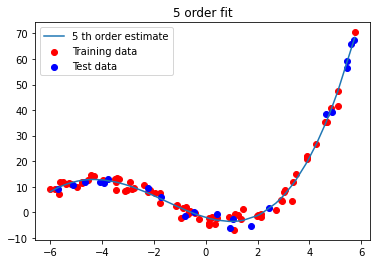

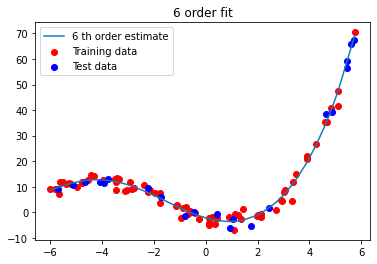

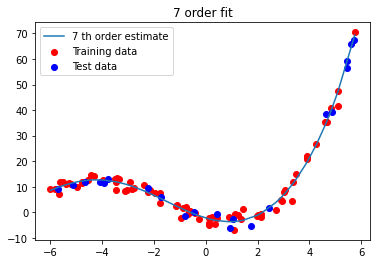

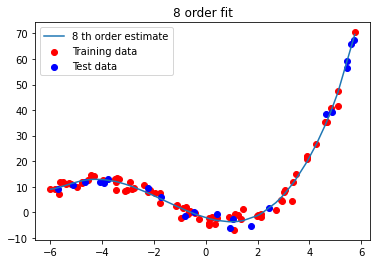

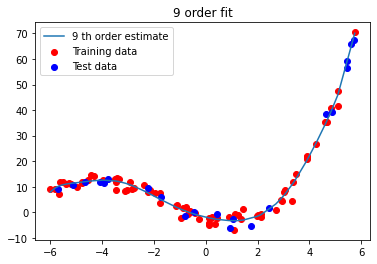

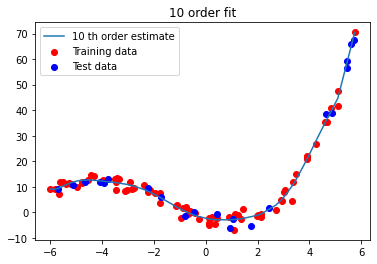

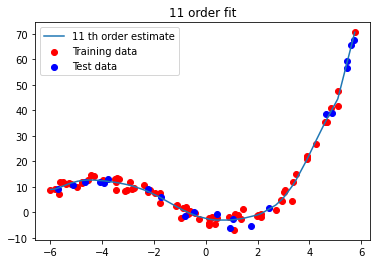

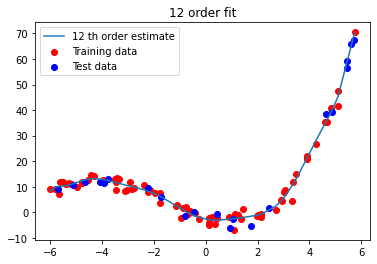

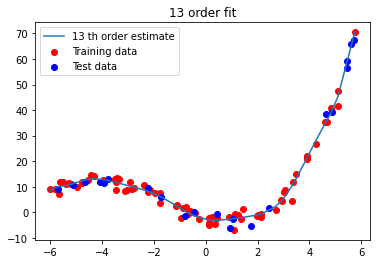

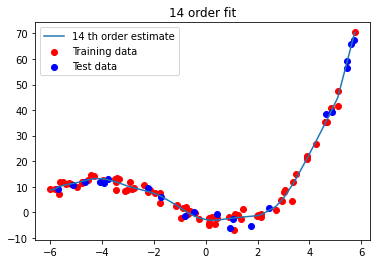

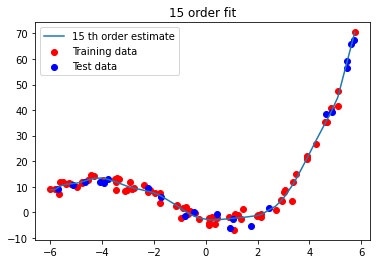

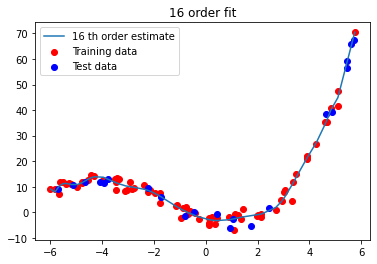

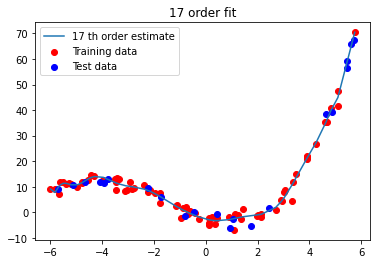

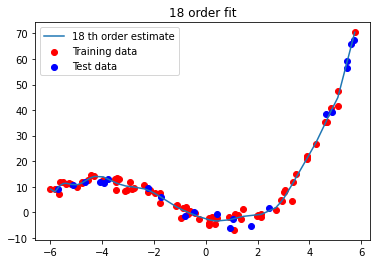

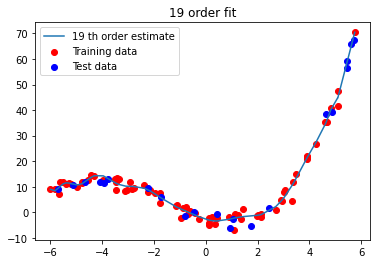

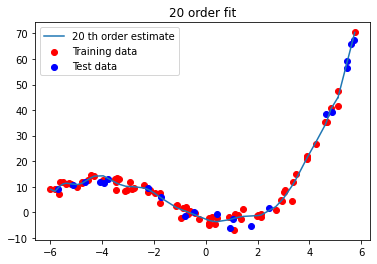

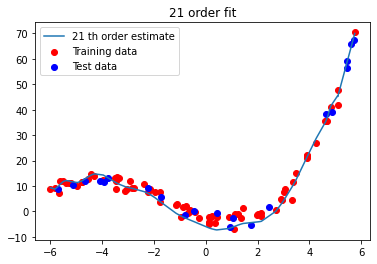

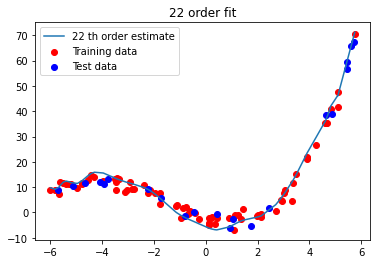

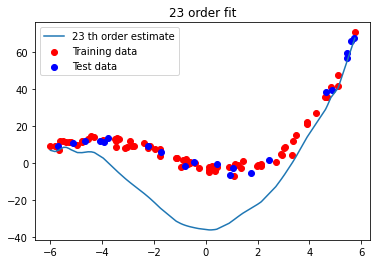

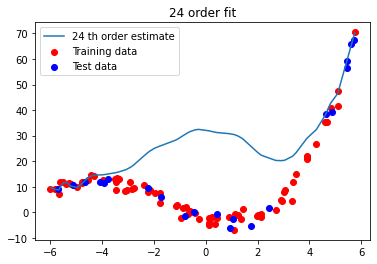

In [57]:
TEST_LOSS = []
TNG_LOSS = []
WEIGHTS = []
prev_loss = 10000000000
ind = 1
for i in range(1,25):
    # Create new plot for every 3 sets of weights
    plt.figure()
    plt.scatter(train_x,train_y,color='red',marker='o', label = 'Training data')
    plt.title(str(i)+ " order fit")
    plt.scatter(test_x,test_y,color='blue',marker='o', label = 'Test data')
    plt.legend()
    
    # Insert new column corresponding to new features in higher dimension
    if(i>1):
        train.insert(i,str(i),train_x**i,True)
        test.insert(i,str(i),test_x**i,True)
        # print("Index: ", i)
        # print(train)
        
    # Compute weights
    weights = compute_weights(train)
    WEIGHTS.append(weights)
    
    # Compute loss
    lss = loss(weights, test)
    tng_loss = loss(weights, train)
    TEST_LOSS.append(lss)
    TNG_LOSS .append(tng_loss)
    
    # Plot data
    plot(weights,train, label = str(i) + " th order estimate", ind=ind)
    ind += 1

Weights:  [array([9.93868008, 1.27667093]), array([-0.82856575,  2.01543484,  1.00404185]), array([-2.28793303, -2.7998931 ,  1.22589986,  0.23949885]), array([-1.99484239, -2.8427335 ,  1.13330672,  0.24265115,  0.0032485 ]), array([-2.01816649e+00, -2.97942072e+00,  1.14253824e+00,  2.61180747e-01,
        2.82567728e-03, -4.87814108e-04]), array([-2.21188565e+00, -2.94145162e+00,  1.27418651e+00,  2.54658100e-01,
       -8.87008855e-03, -2.78215627e-04,  2.51307120e-04]), array([-2.22378205e+00, -3.01258680e+00,  1.28239462e+00,  2.72273966e-01,
       -9.67268761e-03, -1.36536442e-03,  2.70035818e-04,  1.90486747e-05]), array([-2.09614235e+00, -3.04731623e+00,  1.12339807e+00,  2.84327062e-01,
        1.59283948e-02, -2.28315174e-03, -9.99852700e-04,  3.74563295e-05,
        1.93474108e-05]), array([-1.92243389e+00, -2.36317578e+00,  9.26380699e-01, -9.21914002e-03,
        4.98307371e-02,  3.13703882e-02, -2.82697477e-03, -1.36451137e-03,
        4.92472613e-05,  1.91681213e-05]),

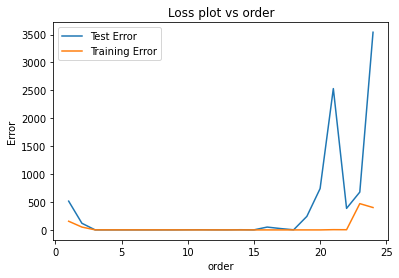

In [58]:
TEST_LOSS = np.array(TEST_LOSS)
TNG_LOSS = np.array(TNG_LOSS)
test_x = np.arange(1,TEST_LOSS.size+1,1)
tng_x = np.arange(1,TNG_LOSS.size+1,1)
plt.figure()
plt.title("Loss plot vs order")
plt.plot(test_x,TEST_LOSS, label = "Test Error")
plt.plot(tng_x,TNG_LOSS, label = "Training Error")
plt.xlabel('order')
plt.ylabel('Error')
plt.legend()
    
    
print("Weights: ", WEIGHTS)
print("Training error: ", TNG_LOSS)
print("Test error: ", TEST_LOSS)